## Notebook to generate various plots for the paper


In [1]:
import pandas as pd
import json
import sys

import matplotlib.pyplot as plt

sys.path.append("../src")
from process import *
from fitting_util import *
from plotting import *

## config

In [2]:
# Viz19, 125 topics, 'astro-only' high-impact journals, 2nd run with SED removed
version = '19_2_125_rec8' #rec1, rec3' # rec5, rec6, rec10

# use filtered? means no Grav Wave topic
use_filtered = True

# RI CAGR offset
cagr_offset = 0.05

In [3]:
# set filtering
filtered = "_filtered" if use_filtered else ""

## load data

In [4]:
d_filename = f'../results/decadal_report_results_{version}{filtered}.csv'
dcs_data = pd.read_csv(d_filename)
dcs_data[:3]

,topic,raw_doc_tcs,doc_tcs,tcs,cagr,keywords,ri
0,0,16.246175,0.016101,609.900815,0.103800,"black hole mass, central black hole, black hol...",93.802862
1,2,5.771721,0.005720,370.527983,0.017668,"surface brightness profile, density field, den...",25.072953
2,3,9.997130,0.009908,852.054470,0.046986,"dark matter halo, density profile, peculiar ve...",82.637339


In [5]:
# load the citation data 
#cite_filename = f"../data/ri_vs_citation_{version}{filtered}.csv"
min_inference = 0.2
contentType = 'decadal'
cite_filename = f'../results/ri_vs_citation_{contentType}_{version}_{min_inference}.csv'
cite_data = pd.read_csv(cite_filename)

cite_data[:3]

,Unnamed: 0,topic,raw_doc_tcs,doc_tcs,tcs,cagr,keywords,ri,avg_cites
0,0,0,16.246175,0.016101,609.900815,0.103800,"black hole mass, central black hole, black hol...",93.802862,250.375532
1,1,2,5.771721,0.005720,370.527983,0.017668,"surface brightness profile, density field, den...",25.072953,165.021635
2,2,3,9.997130,0.009908,852.054470,0.046986,"dark matter halo, density profile, peculiar ve...",82.637339,183.341705


In [6]:
w_filename = f'../results/whitepapers_results_{version}{filtered}.csv'
whitepaper_data = pd.read_csv(w_filename)

whitepaper_data[:3]

,topic,raw_doc_tcs,doc_tcs,tcs,cagr,keywords,ri
0,0,3.394672,0.012389,609.900815,0.103800,"black hole mass, central black hole, black hol...",93.802862
1,2,0.257885,0.000941,370.527983,0.017668,"surface brightness profile, density field, den...",25.072953
2,3,2.594233,0.009468,852.054470,0.046986,"dark matter halo, density profile, peculiar ve...",82.637339


In [7]:
vers = version.split('_rec')[0]
mt_filename = f'../results/mlcr_min_inferences_{contentType}_{vers}{filtered}.csv'
mt_data = pd.read_csv(mt_filename)

mt_data[:3]

,mean_cagr,mean_ri,mean_doc_tcss,stderr_cagr,stderr_ri,stderr_doc_tcs,min_inference
0,0.654336,0.371117,0.437167,0.012165,0.014166,0.020149,0.01
1,0.669570,0.383184,0.434317,0.010499,0.015630,0.020149,0.10
2,0.691667,0.423980,0.436170,0.009200,0.019744,0.020149,0.15


## Code

In [8]:
def research_plot1 (version:str, dcs_data:pd.DataFrame, label_fontsize:int=14):
    
    ''' Figure for paper/poster '''
    fig, ax1 = plt.subplots(1, 1)
    
    # plot LHS
    x=np.array(dcs_data['raw_doc_tcs'])
    y=np.array(dcs_data['ri'])
    plot_data (x, y, ax=ax1)
    #ax1.set_title("RI (1998-2010 Literature) vs DCS (2010 Survey)", fontsize=label_fontsize)
    ax1.set_title("", fontsize=label_fontsize)
    ax1.set_xlabel("$TCS_{DS2010}$", fontsize=label_fontsize)
    ax1.set_ylabel("$RI_{1998-2010}$", fontsize=label_fontsize)
    #ax1.set_ylim([0, 200])
    
    # write to disk for distribution
    fig = plt.gcf()
    fig.set_size_inches(8.0, 6.0)
    fig.subplots_adjust(left=0.15)
    
    plt.savefig(f'../plots/ri_vs_dcs2010_diagram_{version}.jpg', transparent=False, dpi=600)
    

def research_plot2 (version:str, data:pd.DataFrame, label_fontsize:int=14):
    
    ''' Figure for paper/poster '''
    
    # 2 plots horizontally side-by-side
    fig, ax2 = plt.subplots(1, 1)

    # plot RHS
    x=np.array(cite_data['avg_cites'])
    y=np.array(cite_data['ri'])
    plot_data (x, y, ax=ax2)
    #ax2.set_title("RI (1998 - 2010) vs MLCR", fontsize=label_fontsize)
    ax2.set_title("", fontsize=label_fontsize)
    ax2.set_xlabel("MLCR", fontsize=label_fontsize)
    ax2.set_ylabel("RI$_{1998-2010}$", fontsize=label_fontsize)
    #ax2.set_ylim([-0.05, 100.155])
    
    # write to disk for distribution
    fig = plt.gcf()
    fig.set_size_inches(8.0, 6.0)
    fig.subplots_adjust(left=0.155)
    
    plt.savefig(f'../plots/ri_vs_cite_diagram_{version}.jpg', transparent=False, dpi=600)
    
def research_plot_cagr_mlcr (version:str, data:pd.DataFrame, label_fontsize:int=14):
    
    ''' Figurefor paper/poster '''
    
    # 2 plots horizontally side-by-side
    fig, ax2 = plt.subplots(1, 1)

    # plot RHS
    x=np.array(data['avg_cites'])
    y=np.array(data['cagr'])
    plot_data (x, y, ax=ax2)
    #ax2.set_title("CAGR (1998 - 2010) vs MLCR, min inf 0.2", fontsize=label_fontsize)
    ax2.set_title("", fontsize=label_fontsize)
    ax2.set_xlabel("MLCR", fontsize=label_fontsize)
    ax2.set_ylabel("TCS_CAGR$_{1998-2010}$", fontsize=label_fontsize)
    #ax2.set_ylim([-0.025, 0.12])
    
    # write to disk for distribution
    fig = plt.gcf()
    fig.set_size_inches(8.0, 6.0)
    fig.subplots_adjust(left=0.155)
    
    plt.savefig(f'../plots/cagr_vs_mlcr_diagram_{version}.jpg', transparent=False, dpi=600)
    
    
def research_plot_doc_tcs_mlcr (version:str, data:pd.DataFrame, label_fontsize:int=14):
    
    ''' Figurefor paper/poster '''
    
    # 2 plots horizontally side-by-side
    fig, ax2 = plt.subplots(1, 1)

    # plot RHS
    x=np.array(data['avg_cites'])
    y=np.array(data['doc_tcs'])
    plot_data (x, y, ax=ax2)
    #ax2.set_title("CAGR (1998 - 2010) vs MLCR, min inf 0.2", fontsize=label_fontsize)
    ax2.set_title("", fontsize=label_fontsize)
    ax2.set_xlabel("MLCR", fontsize=label_fontsize)
    ax2.set_ylabel("TCS$_{DS2010}$", fontsize=label_fontsize)
    #ax2.set_ylim([-0.025, 0.12])
    
    # write to disk for distribution
    fig = plt.gcf()
    fig.set_size_inches(8.0, 6.0)
    fig.subplots_adjust(left=0.155)
    
    plt.savefig(f'../plots/ds2010_tcs_vs_mlcr_diagram_{version}.jpg', transparent=False, dpi=600)
    

def research_plot_tcs_mlcr (version:str, data:pd.DataFrame, label_fontsize:int=14):
    
    ''' Figurefor paper/poster '''
    
    # 2 plots horizontally side-by-side
    fig, ax2 = plt.subplots(1, 1)

    # plot RHS
    x=np.array(data['avg_cites'])
    y=np.array(data['tcs'])
    plot_data (x, y, ax=ax2)
    #ax2.set_title("CAGR (1998 - 2010) vs MLCR, min inf 0.2", fontsize=label_fontsize)
    ax2.set_title("", fontsize=label_fontsize)
    ax2.set_xlabel("MLCR", fontsize=label_fontsize)
    ax2.set_ylabel("TCS$_{1998-2010}$", fontsize=label_fontsize)
    #ax2.set_ylim([-0.025, 0.12])
    
    # write to disk for distribution
    fig = plt.gcf()
    fig.set_size_inches(8.0, 6.0)
    fig.subplots_adjust(left=0.155)
    
    plt.savefig(f'../plots/tcs_vs_mlcr_diagram_{version}.jpg', transparent=False, dpi=600)
    
    
def research_plot_ri_tcs_whitepaper (version:str, data:pd.DataFrame, label_fontsize:int=14):
    
    ''' Figure for paper/poster '''
    fig, ax1 = plt.subplots(1, 1)
    
    # plot LHS
    x=np.array(data['raw_doc_tcs'])
    y=np.array(data['ri'])
    plot_data (x, y, ax=ax1)
    #ax1.set_title("RI (1998-2010 Literature) vs TCS (2010 Whitepapers)", fontsize=label_fontsize)
    ax1.set_title("", fontsize=label_fontsize)
    ax1.set_xlabel("$TCS_{whitepaper}$", fontsize=label_fontsize)
    ax1.set_ylabel("$RI_{1998-2010}$", fontsize=label_fontsize)
    #ax1.set_ylim([0, 300])
    
    # write to disk for distribution
    fig = plt.gcf()
    fig.set_size_inches(8.0, 6.0)
    fig.subplots_adjust(left=0.15)
    
    plt.savefig(f'../plots/ri_vs_whitepaper_diagram_{version}.jpg', transparent=False, dpi=600)
    
def research_plot_paper_inference_thresh (version:str, data:pd.DataFrame, label_fontsize:int=14):

    fig, ax1 = plt.subplots(1, 1)

    y=np.array(data['mean_cagr'])
    x=np.array(data['min_inference'])
    y_err=np.array(data['stderr_cagr'])
    plot_data (x, y, ax=ax1)

    ax1.plot(x, y, marker='o', markerfacecolor='red', linestyle=' ')
    plt.errorbar(x, y, fmt='ko', yerr=y_err)

    ax1.set_ylabel("Mean R (TCS_CAGR$_{1998-2010}$ vs MLCR)", fontsize=label_fontsize)
    ax1.set_xlabel("I$_{paper}$ minimum threshold", fontsize=label_fontsize)
    ax1.set_title("", fontsize=label_fontsize)
    
    # write to disk for distribution
    fig = plt.gcf()
    fig.set_size_inches(8.0, 6.0)
    fig.subplots_adjust(left=0.15)
    
    plt.savefig(f'../plots/mlcr_vs_stable_thresh_diagram_{version}.jpg', transparent=False, dpi=600)
    

import matplotlib.pyplot as plt
import matplotlib.lines as mlines


def makeline(p1, p2, color:str=None, dashed:bool=False):
    ax = plt.gca()
    l = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]])
    if color:
        l.set_color(color)
    if dashed:
        l.set_dashes([2, 2,]) 
    ax.add_line(l)
    return l

def tcs_ri (ri:float, cagr:float, offset:float=cagr_offset)->float:
    return float(ri / (cagr + offset))

def cagr_ri (ri:float, tcs:float, offset:float=cagr_offset)->float:
    return float(( ri / tcs ) - offset)

def points_by_ri (ri:float, cagr_min:float=0.0, cagr_max:float=0.15, offset:float=cagr_offset)->list:
    p1_x = tcs_ri(ri, cagr_min, offset=offset)
    p1_y = cagr_ri(ri, p1_x, offset=offset)
    
    p2_x = tcs_ri(ri, cagr_max, offset=offset)
    p2_y = cagr_ri(ri, p2_x, offset=offset)
    
    return ((p1_x, p1_y), (p2_x,p2_y))

def research_plot_tcs_cagr (version:str, data:pd.DataFrame, label_fontsize:int=14):

    fig, ax1 = plt.subplots(1, 1)

    y=np.array(data['cagr'])
    x=np.array(data['tcs'])
    #y_err=np.array(data['stderr_cagr'])
    plot_data (x, y, ax=ax1)

    ax1.plot(x, y, marker='o', markerfacecolor='red', linestyle=' ')

    ax1.set_ylabel("TCS_CAGR$_{1998-2010}$", fontsize=label_fontsize)
    ax1.set_xlabel("TCS$_{1998-2010}$", fontsize=label_fontsize)
    ax1.set_title("", fontsize=label_fontsize)
    
    ax1.set_ylim([-0.03, 0.16])
    
    # write 'iso-ri' lines in plot
    cagr_step = 0.005
    for ri in [20, 50, 100]:
        for cagr_min in [i * cagr_step for i in range(-8, 32)]:
            cagr_max = cagr_min + cagr_step
            (p1, p2) = points_by_ri (ri, cagr_min=cagr_min, cagr_max=cagr_max, offset=cagr_offset)
            #print (p1,p2)
            makeline(p1, p2)
    
    ax1.text(1280, 0.0225, r'RI = 100', fontsize=12, rotation=-15)
    ax1.text(1280, -0.0125, r'RI = 50', fontsize=12, rotation=-10)
    ax1.text(875, -0.028, r'RI = 20', fontsize=12, rotation=-10)
    
    #makeline((500.,0.15), (1000.,-0.025), color='orange', dashed=True)
        
    makeline((275.,0.15), (275.,0.075), color='green', dashed=True)
    makeline((275,0.075), (775,0.075), color='green', dashed=True)
    makeline((775,0.075), (775,0.15), color='green', dashed=True)
    makeline((275,0.15), (775,0.15), color='green', dashed=True)
                    
    # write to disk for distribution
    fig = plt.gcf()
    fig.set_size_inches(8.0, 6.0)
    fig.subplots_adjust(left=0.15)
    
    plt.savefig(f'../plots/tcs_vs_cagr_diagram_{version}.jpg', transparent=False, dpi=600)


In [9]:
dcs_data.sort_values('ri', ascending=False)[:3]

,topic,raw_doc_tcs,doc_tcs,tcs,cagr,keywords,ri
31,32,30.646482,0.030373,952.827311,0.159414,"giant planet, extrasolar planet, planetary sys...",199.535135
40,41,17.582349,0.017426,942.232127,0.138898,"stellar mass, massive galaxy, stellar masse, <...",177.985593
90,91,8.464954,0.008389,1150.848472,0.042754,"high energy, low energy, energy spectrum, sola...",106.745256


In [10]:
dcs_data.sort_values('ri', ascending=False)[:3]

,topic,raw_doc_tcs,doc_tcs,tcs,cagr,keywords,ri
31,32,30.646482,0.030373,952.827311,0.159414,"giant planet, extrasolar planet, planetary sys...",199.535135
40,41,17.582349,0.017426,942.232127,0.138898,"stellar mass, massive galaxy, stellar masse, <...",177.985593
90,91,8.464954,0.008389,1150.848472,0.042754,"high energy, low energy, energy spectrum, sola...",106.745256


## Make Plots

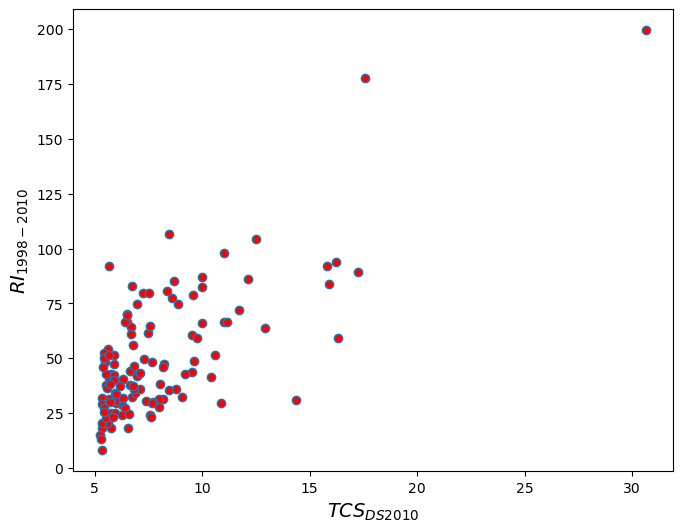

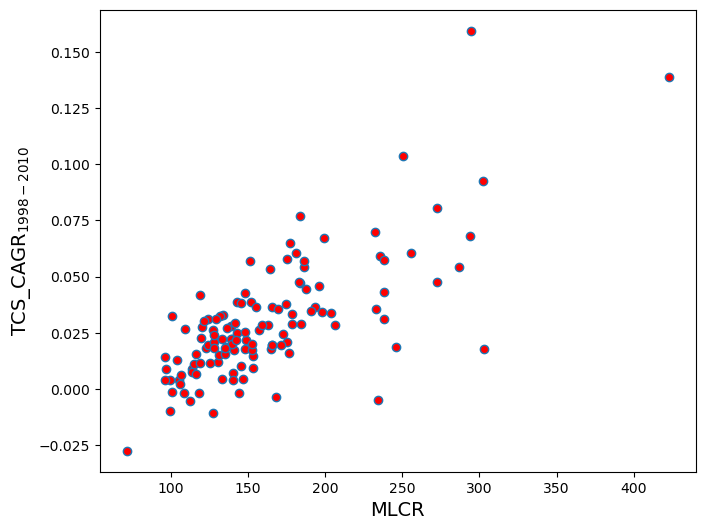

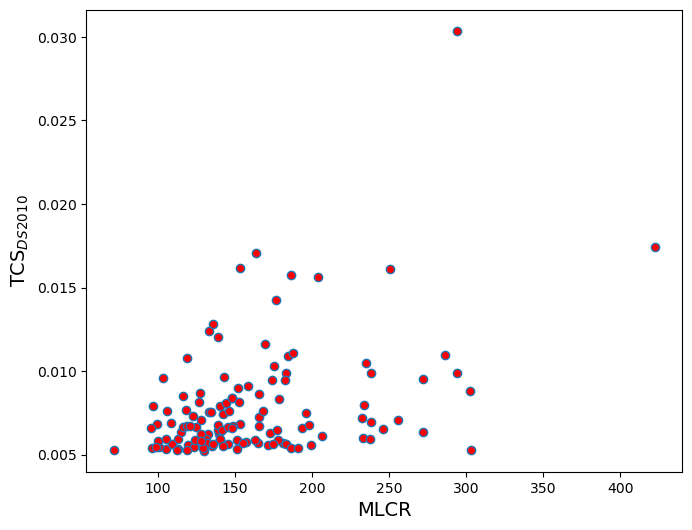

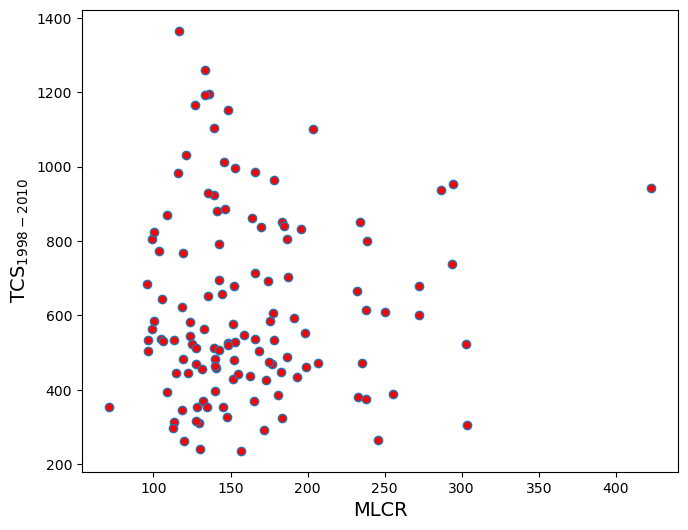

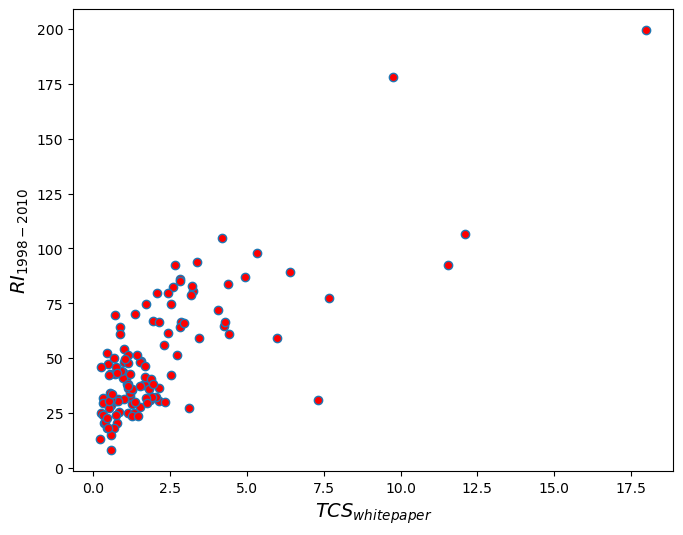

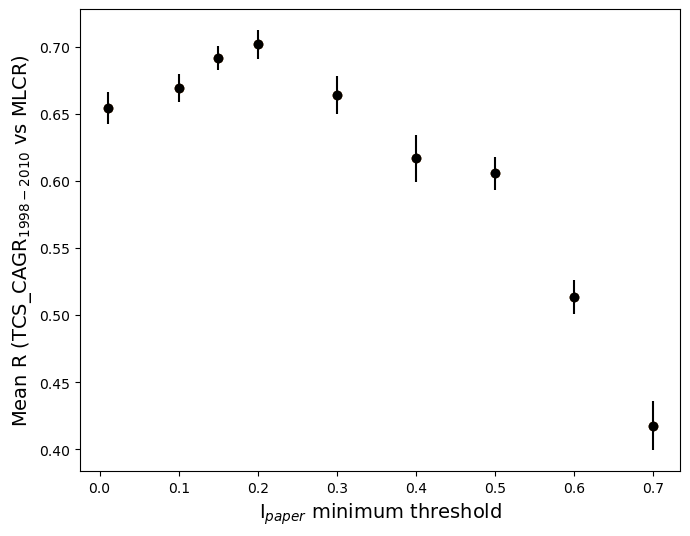

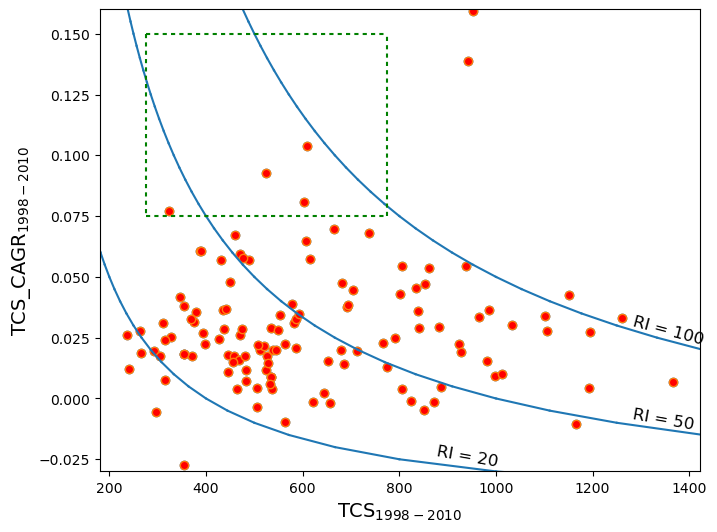

In [11]:
research_plot1 (version, dcs_data, 14) # rec3
research_plot_cagr_mlcr (version, cite_data, 14) # rec??
research_plot_doc_tcs_mlcr (version, cite_data, 14) 
research_plot_tcs_mlcr (version, cite_data, 14) 
research_plot_ri_tcs_whitepaper (version, whitepaper_data, 14) # rec8
research_plot_paper_inference_thresh(version, mt_data, 14)
research_plot_tcs_cagr(version, dcs_data, 14) # rec1